In [1]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 3: Color Image Processing: Revisiting Histogram Equalization

While going through the lecture notes for processing colored images, you must have realized that it's as easy as applying the operation on individual RGB channels. An alternate way to do a similar thing is converting the RGB image to HSI and then apply the operation only on the 'I' channel, which produces more or less similar results to the RGB method. But this isn't always true specifically for the histogram equalization RGB method fails to preserve the original image's color.

In this task, we will explore both methods for histogram equalization.

**Note:** Instead of using HSI, we will use HSV. HSV is similar to HSI (not the same). Use channel 'V' in place 'I' in your algorithm.

In [2]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-2ntfa4y0
  Created wheel for ee604-plugins: filename=ee604_plugins-0.3.2-cp36-none-any.whl size=2311 sha256=d6b57f03512c957952898b08aee1140e34800d045d76c3496993fabd00645f86
  Stored in directory: /tmp/pip-ephem-wheel-cache-1up1yjx8/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-2ntfa4y0


In [3]:
# Importing required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

from ee604_plugins import download_dataset, cv2_imshow
download_dataset(assignment_no=3, task_no=3) # download data for this assignment

Download Complete!


In [4]:
def histogram_eq_rgb(img):
    '''
    Write a program to implement histogram equalization by 
    applying equalization operation on each of the individual RGB channel
    
    Inputs:
    + img - colored image of size N x N x 3
          - values between [0, 255] - 'uint8'
    
    Ouputs:
    + out_img - Equalized image of size N x N x 3
              - values between [0, 255] - 'uint8'
    
    Allowed modules:
    + You are allowed to use cv2.equalizeHist() or any other relevant module.
    
    Hint:
    + Not needed.
    
    '''
    
    #############################
    # Start your code from here #
    #############################

    img[:, :, 0] = cv2.equalizeHist(img[:, :, 0])
    img[:, :, 1] = cv2.equalizeHist(img[:, :, 1])
    img[:, :, 2] = cv2.equalizeHist(img[:, :, 2])
    out_img = np.copy(img)

    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [5]:
def histogram_eq_hsv(img):
    '''
    Write a program to implement histogram equalization by 
    applying equalization operation only on the 'V' channel
    
    Inputs:
    + img - colored image of size N x N x 3
          - values between [0, 255] - 'uint8'
    
    Ouputs:
    + out_img - Equalized image of size N x N x 3
              - values between [0, 255] - 'uint8'
    
    Allowed modules:
    + You are allowed to use cv2.equalizeHist() or any other relevant module.
    
    Hint:
    + Not needed.
    
    '''
    
    #############################
    # Start your code from here #
    #############################

    img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    img[:, :, 2] = cv2.equalizeHist(img[:, :, 2])
    out_img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    
    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [6]:
def histogram_eq_hsv_multi(img):
    '''
    Write a program to implement histogram equalization by 
    applying equalization operation on all the three HSV channels
    
    Inputs:
    + img - colored image of size N x N x 3
          - values between [0, 255] - 'uint8'
    
    Ouputs:
    + out_img - Equalized image of size N x N x 3
              - values between [0, 255] - 'uint8'
    
    Allowed modules:
    + You are allowed to use cv2.equalizeHist() or any other relevant module.
    
    Hint:
    + Not needed.
    
    '''
    
    #############################
    # Start your code from here #
    #############################

    img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    img[:, :, 0] = cv2.equalizeHist(img[:, :, 0])
    img[:, :, 1] = cv2.equalizeHist(img[:, :, 1])
    img[:, :, 2] = cv2.equalizeHist(img[:, :, 2])
    out_img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    
    #############################
    # End your code here ########
    #############################    
    
    return out_img

### Observations

In [7]:
# Do not change codes inside this cell
# Add your observations in next to next cell
# Your observation should compare different methods for different images
# Try to explain why RGB method does not work

deer_pixabay = cv2.imread("data/uneq_deer_pixabay.jpg")
japanese_umbrellas_pixabay = cv2.imread("data/uneq_japanese_umbrellas_pixabay.jpg")

def plot_frame(gridx, gridy, subplot_id, img, name):
    plt.subplot(gridx, gridy, 1 + int(subplot_id))
    plt.imshow(np.uint8(img[:, :, [2, 1, 0]]))
    plt.axis("off")
    plt.title(name)

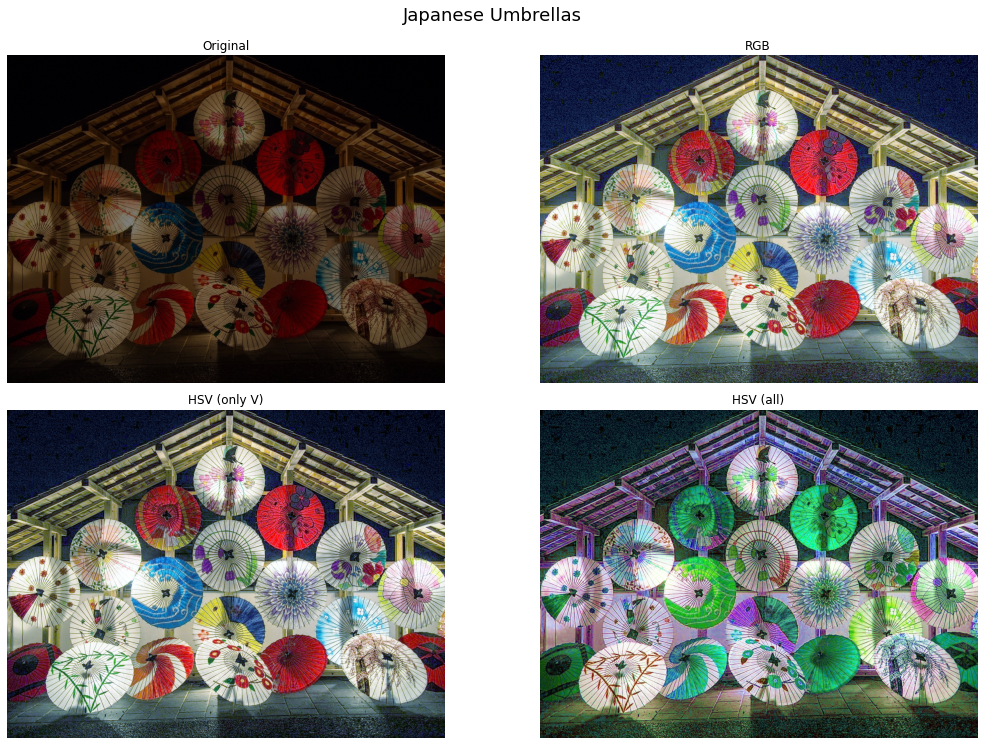

---------------------------------------------------------------------------------------------


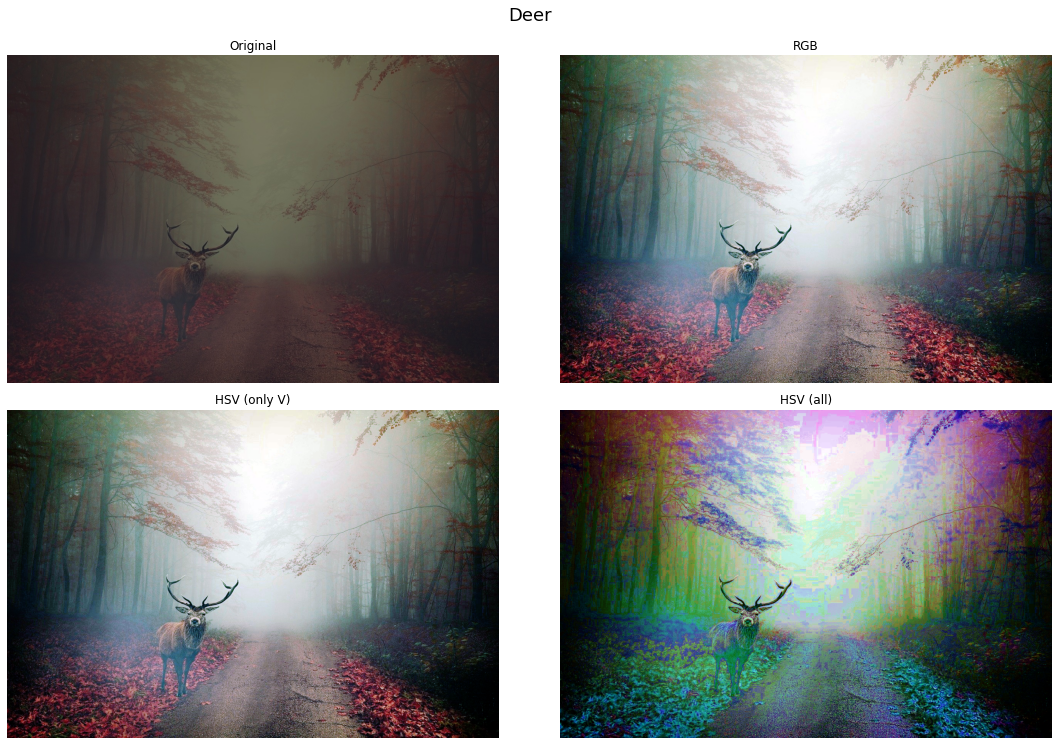

In [8]:
# Do not change codes inside this cell
fig = plt.figure(figsize=(16, 10))
plot_frame(2, 2, 0, japanese_umbrellas_pixabay, "Original")

tmp = histogram_eq_rgb(japanese_umbrellas_pixabay)
plot_frame(2, 2, 1, tmp, "RGB")

tmp = histogram_eq_hsv(japanese_umbrellas_pixabay)
plot_frame(2, 2, 2, tmp, "HSV (only V)")

tmp = histogram_eq_hsv_multi(japanese_umbrellas_pixabay)
plot_frame(2, 2, 3, tmp, "HSV (all)")

fig.suptitle('Japanese Umbrellas', fontsize=18, y=1.03)
fig.tight_layout()
plt.show()

print("---------------------------------------------------------------------------------------------")

fig = plt.figure(figsize=(16, 10))
plot_frame(2, 2, 0, deer_pixabay, "Original")

tmp = histogram_eq_rgb(deer_pixabay)
plot_frame(2, 2, 1, tmp, "RGB")

tmp = histogram_eq_hsv(deer_pixabay)
plot_frame(2, 2, 2, tmp, "HSV (only V)")

tmp = histogram_eq_hsv_multi(deer_pixabay)
plot_frame(2, 2, 3, tmp, "HSV (all)")

fig.suptitle('Deer', fontsize=18, y=1.03)
fig.tight_layout()
plt.show()

In [9]:
your_observation = """
RGB and Only V equalization are same (atleast for the eye)
"""

print(your_observation)


RGB and Only V equalization are same (atleast for the eye)

